##### Module 2 Autograded Assignment

This is a programming assignment for the material you have learned in Module 2. 

Cells marked with `#Hidden Test Cell` will contain tests on your code that are not visible to you. Be sure you are confident in your answers before submitting your assignment!

In [1]:
# Load Required Libraries
library(testthat)

## Problem 1

You work at a candy store and recently recieved a large shipment of boxes of assorted chocolates. Each box contains two types of chocolates, filled and unfilled, but you don't know how many of each are in each box. Your boss has given you the task of finding the proportion of chocolates that are filled and unfilled. Well, I guess we're going to have to eat some chocolates! Assume that each box comes from the same underlying distribution.

Let $X_i, i \in {1. \dots, n}$ be a random variable for the number of chocolates you eat from a box *before* you eat an unfilled chocolate. This means $X$ has a Geometric distribution with some probability $p$:

$$ f_X(x) = p(1-p)^xI_{\{0,1,\dots\}}(x) $$

**Part A)** What is the MLE $\hat{p}$, given $X_1, \dots, X_n$? Once you are ready to answer, give the integer number corresponding to your answer in the variable `prob.1.a`. (i.e. Possible answers are 1,2,3,4,5,6)

1. $\bar{X}$
2. $1/\bar{X}$
3. $1 / (\bar{X}+1)$
4. $\bar{X} / (1 - \bar{X})$
5. $(1 - \bar{X}) / \bar{X}$
6. None of the above.

In [2]:
prob.1.a = NA

### BEGIN SOLUTIONS HERE
prob.1.a = 3
### END SOLUTIONS HERE

In [3]:
# Hidden Test Cell
test_that("Make sure your answer is a numeric!", expect_is(prob.1.a, "numeric"))
### BEGIN HIDDEN TESTS
test_that("Problem 1.a", expect_equal(prob.1.a, 3))
### END HIDDEN TESTS

**Part B)** 

We have a theoretical understanding of what $\hat{p}$ should be, but let's she what that value is when we have actual data.

The cell below loads 10 samples of this random variable. In other words, we opened 10 boxes of chocolates, and recorded the number of chocolates we had to eat before we found an unfilled chocolate. We only have 10, because we needed a break from the chocolate at that point. Using that data, calculate $\hat{p}$ of your sample. Save your solution as `p.hat`.

In [4]:
# Load the data
trials = readRDS("trials.rds")
trials

[1] 1 1 7 0 3 0 1 4 4 0

In [5]:
p.hat = NA
### BEGIN SOLUTION HERE
p.hat = 1/(mean(trials)+1)
p.hat
### END SOLUTION HERE

[1] 0.3225806

In [6]:
# Hidden Test Cell
### BEGIN HIDDEN TESTS
p.hat.answer = 1/(mean(trials)+1)
test_that("Checking sample calculations", expect_equal(p.hat, p.hat.answer, tol=1e-3))
### END HIDDEN TESTS

**Part C)**

Remember, an estimator is still a random variable. That means the $\hat{p}$ we calculated in **Part B** is just one instance from some underlying sampling distribution for $\hat{p}$. Let's take a look at what this underlying distribution look like.

The cell below loads a table containing 1000 instances of the above trials. That is, we opened 10 boxes and, for each box, recorded the number of chocolates that we observed before one was unfilled. Then we repeated that process 1000 times. That's a lot of chocolate.

Calculate the $\hat{p}$ for each instance of the data. This should result in a vector of length 1000. Then plot a histogram of these $\hat{p}$ values.

Save four statistics from these $\hat{p}$'s:
* The sample mean as `p.hat.sample.mean`.
* The sample standard deviation as `p.hat.sample.sd`.
* The sample minimum as `p.hat.sample.min`.
* The sample maximum as `p.hat.sample.max`.

In [7]:
chocolate.data = read.csv("more_chocolate.csv")
chocolate.data = chocolate.data[-1]
head(chocolate.data)

,box1,box2,box3,box4,box5,box6,box7,box8,box9,box10
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,1,1,6,1,4,4,0,1,9
2,0,6,1,8,1,0,0,2,0,5
3,0,6,2,3,1,0,0,2,1,0
4,3,6,2,2,2,3,0,6,0,3
5,1,2,0,0,2,2,3,0,2,2
6,0,1,0,0,2,0,0,2,4,3


[1] 0.3194003

[1] 0.08821157

[1] 0.1369863

[1] 0.6666667

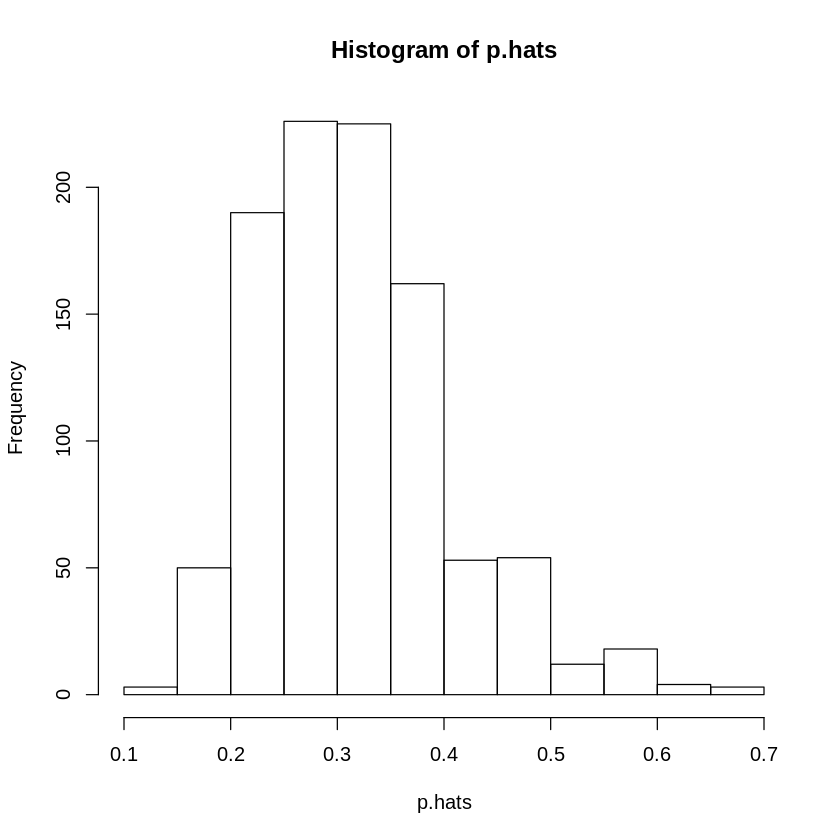

In [8]:
p.hat.sample.mean = NA
p.hat.sample.sd = NA
p.hat.sample.min = NA
p.hat.sample.max = NA

### BEGIN SOLUTION HERE
# Calculate the phat of each row
p.hats = apply(chocolate.data[], 1, (function(row) 1/(mean(row)+1)) )
# Plot the histogram of p.hats
hist(p.hats)
                                     
# Save the mean and standard deviation of p.hats
p.hat.sample.mean = mean(p.hats)
p.hat.sample.sd = sd(p.hats)
p.hat.sample.min = min(p.hats)
p.hat.sample.max = max(p.hats)
### END SOLUTION HERE
p.hat.sample.mean
p.hat.sample.sd
p.hat.sample.min
p.hat.sample.max

In [9]:
# Hidden Test Cell
### BEGIN HIDDEN TESTS
p.hats = apply(chocolate.data[], 1, (function(row) 1/(mean(row)+1)) )
mean.answer = mean(p.hats)
sd.answer = sd(p.hats)
min.answer = min(p.hats)
max.answer = max(p.hats)
test_that("Checking p.hat statistics", {expect_equal(p.hat.sample.mean, mean.answer, tol=1e-3)
                                        expect_equal(p.hat.sample.sd, sd.answer, tol=1e-3)
                                        expect_equal(p.hat.sample.min, min.answer, tol=1e-3)
                                        expect_equal(p.hat.sample.max, max.answer, tol=1e-3)})
### END HIDDEN TESTS

**Thought Exercise**

The underlying probability for this question was $p=0.3$. Take a look at the histogram and the calculated values around your $\hat{p}$'s. How similar was the MLE to the actual value? 

**Part D)** 

Another important thing to note is that we only opened $10$ boxes for each trial. Would our sample $\hat{p}$ histogram be wider if we opened more boxes for each trial, say 20? Submit your answer by saving either `wider`, `narrower` or `same` into variable `prob.1.d`.

In [10]:
prob.1.d = NA

### BEGIN SOLUTION HERE
prob.1.d = "narrower"
### END SOLUTION HERE

In [11]:
# Hidden Test Cell
test_that("Make sure answer is within group", expect_true(prob.1.d %in% c("wider", "narrower", "same")))
### BEGIN HIDDEN TESTS
test_that("Test Prob.1.d", expect_equal(prob.1.d, "narrower"))
### END HIDDEN TESTS

# Problem 2

Let $X_i \sim Poisson(\lambda), i\in{1,\dots,n}$ with $\lambda = 5$. Recall that the MLE $\hat\lambda$ for a Poisson distribution is equal to the sample mean $\bar{X}$.

**Part A)** 

The data being created into `prob.2.a.data` is 12 random samples from the $Poisson(5)$ distribution. Calculate the observed MLE, as well as the theoretical variance and bias for the MLE. (Your variance and bias calculations will have nothing to do with the generated data.) Store the your answers in `mle`, `mle.var` and `mle.bias` respectively.

In [12]:
set.seed(0)
lambda = 5
n = 12
prob.2.a.data = rpois(n, lambda)
prob.2.a.data

[1] 8 4 4 5 8 3 8 9 6 6 2 3

In [13]:
mle = NA
mle.var = NA
mle.bias = NA

### BEGIN SOLUTION HERE
# MLE = xbar
mle = mean(prob.2.a.data)
# var(mle) = var(xbar) = sigma^2/n = lambda/n = 5/12
mle.var = 5/12
# bias(mle) = E[xbar] - lambda = lambda - lambda = 0
mle.bias = 0
### END SOLUTION HERE
mle
mle.var
mle.bias

[1] 5.5

[1] 0.4166667

[1] 0

In [14]:
# Hidden Test Cell
### BEGIN HIDDEN TESTS
mle.answer = mean(prob.2.a.data)
mle.var.answer = lambda / n
mle.bias.answer = 0

test_that("Checking MLE", {expect_equal(mle, mle.answer)
                           expect_equal(mle.var, mle.var.answer)
                           expect_equal(mle.bias, mle.bias.answer)})
### END HIDDEN TESTS

**Part B)**

What is the $MSE(\hat\lambda)$? Save your answer as `mse`.

In [15]:
mse = NA

### BEGIN SOLUTION HERE
# mse(mle) = var(mle) + bias(mle)^2
mse = mle.var + mle.bias^2
### END SOLUTION HERE
mse

[1] 0.4166667

In [16]:
# Hidden Test Cell
### BEGIN HIDDEN TESTS
test_that("mse", expect_equal(mse, mle.var))
### END HIDDEN TESTS

**Part C)**

Let the MLE from **Part A** be denoted $\hat\lambda_1$. The data be created into `prob.2.c.data` is 8 samples from the $Poisson(5)$ distribution. Let the MLE for this distribution be $\hat\lambda_2$. What is the relative efficiency of $\hat\lambda_1$, realtive to $\hat\lambda_2$? Save your answer as `rel.eff`.

In [17]:
set.seed(112358)
n.2 = 8
prob.2.c.data = rpois(n.2, lambda)
prob.2.c.data

[1] 4 6 8 6 6 7 4 6

In [18]:
rel.eff = NA

### BEGIN SOLUTION HERE
# rel.eff = var(lambda_2) / var(lambda_1)
# Remember var(lambda.hat) = var(xbar) = sigma^2/n = lambda/n
rel.eff = (5/8) / (5/12)
### END SOLUTION HERE
rel.eff

[1] 1.5

In [19]:
# Hidden Test Cell
### BEGIN HIDDEN TESTS
test_that("relative efficiency", expect_equal(rel.eff, (lambda/n.2)/(lambda/n), tol=0.1))
### END HIDDEN TESTS